In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_pickle("data.pkl")

In [3]:
data

,Price,RoomInfo,Address,href,#Beds,#Baths,Area,Zip,PricePerFoot
0,315000,"3 bed, 2 bath, 1,802 sqft","4900 San Fernando St E, Brownsville, TX 78526",https://www.bing.com/homes/4900-San-Fernando-S...,3.0,2.0,1802.0,78526,174.805771
1,219900,"3 bed, 2 bath, 1,645 sqft","4125 Orchid Ave, McAllen, TX 78504",https://www.bing.com/homes/4125-Orchid-Ave-McA...,3.0,2.0,1645.0,78504,133.677812
2,320000,"3 bed, 2.5 bath, 1,630 sqft","1927 S 48th Ln, McAllen, TX 78503",https://www.bing.com/homes/1927-S-48th-Ln-McAl...,3.0,2.5,1630.0,78503,196.319018
3,195000,"3 bed, 2 bath, 1,543 sqft","2701 Silver Oak Ave, Mission, TX 78574",https://www.bing.com/homes/2701-Silver-Oak-Ave...,3.0,2.0,1543.0,78574,126.377187
5,279900,"4 bed, 2 bath, 2,212 sqft","1905 Comarex St, Mission, TX 78573",https://www.bing.com/homes/1905-Comarex-St-Mis...,4.0,2.0,2212.0,78573,126.537071
...,...,...,...,...,...,...,...,...,...
1169,269900,"3 bed, 2 bath, 1,464 sqft","1015 Brooks Dr, Mission, TX 78572",https://www.bing.com/homes/1015-Brooks-Dr-Miss...,3.0,2.0,1464.0,78572,184.357923
1171,1900000,"4 bed, 6 bath, 7,628 sqft","3500 E Saint Jude Ave, Mission, TX 78573",https://www.bing.com/homes/3500-E-Saint-Jude-A...,4.0,6.0,7628.0,78573,249.082328
1172,450000,"3 bed, 3 bath, 2,142 sqft","2528 Hatfield Ave, Edinburg, TX 78539",https://www.bing.com/homes/2528-Hatfield-Ave-E...,3.0,3.0,2142.0,78539,210.084034
1174,1682315,"3 bed, 2 bath, 1,711 sqft","3320 N Taylor Rd, McAllen, TX 78501",https://www.bing.com/homes/3320-N-Taylor-Rd-Mc...,3.0,2.0,1711.0,78501,983.234950


<AxesSubplot: xlabel='Price', ylabel='Count'>

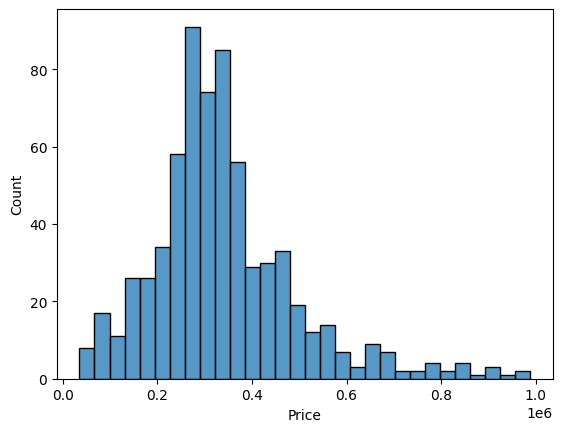

In [4]:
sns.histplot(data[data["Price"]<1000000]["Price"])

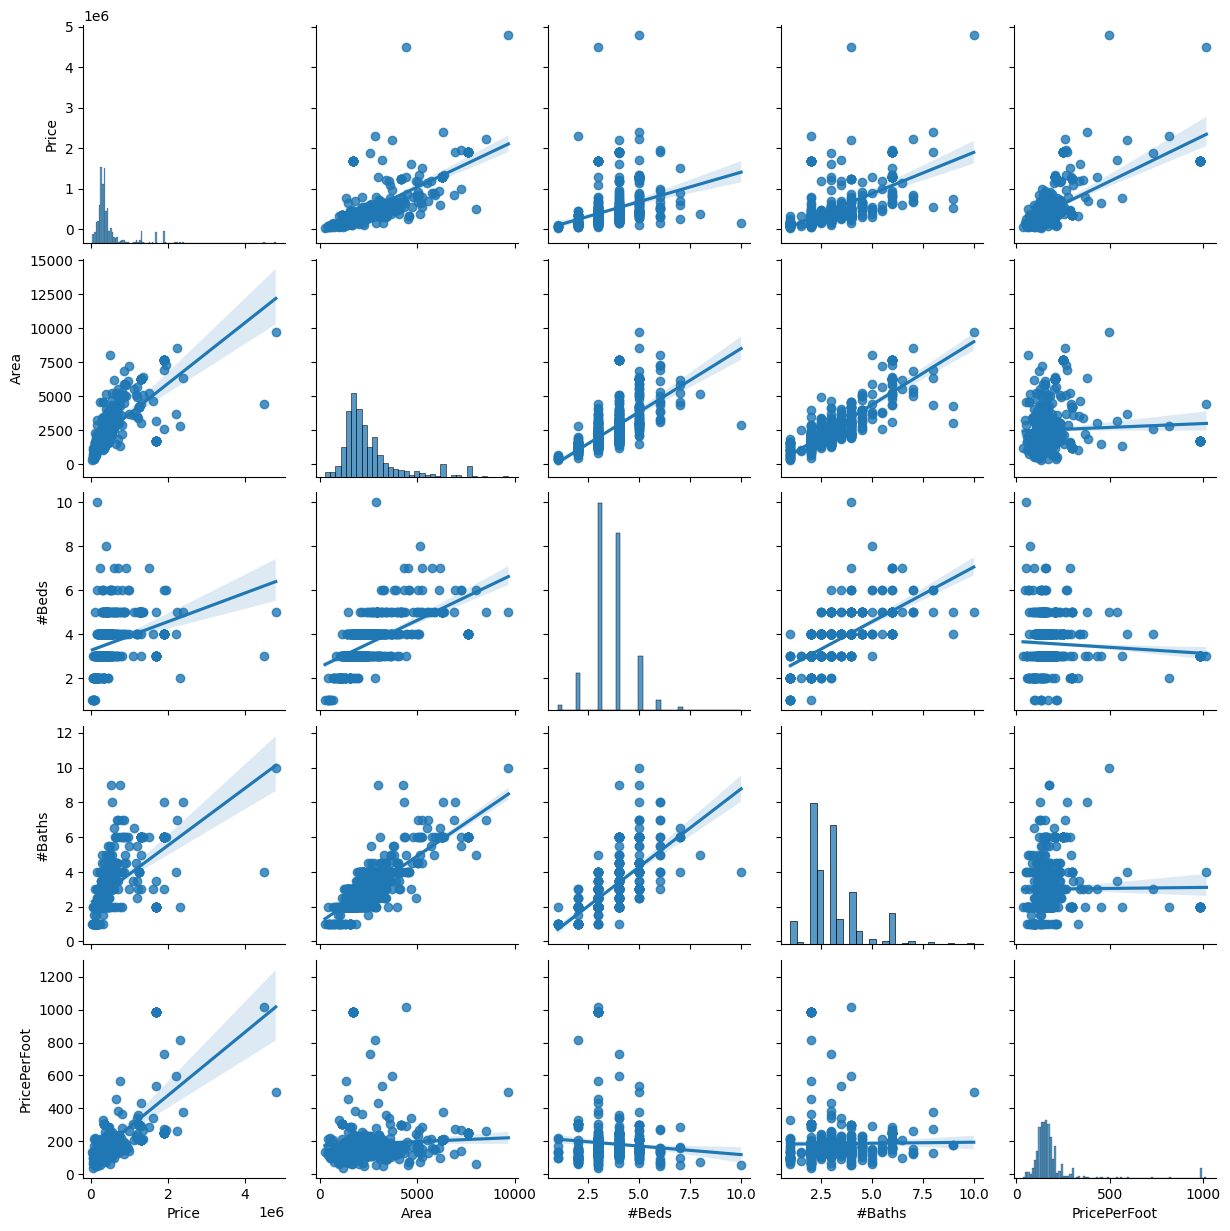

In [5]:
sns.pairplot(
    data=data[['Price','Area', '#Beds','#Baths',"PricePerFoot"]],
    kind='reg',
    dropna=True,
)
plt.show()

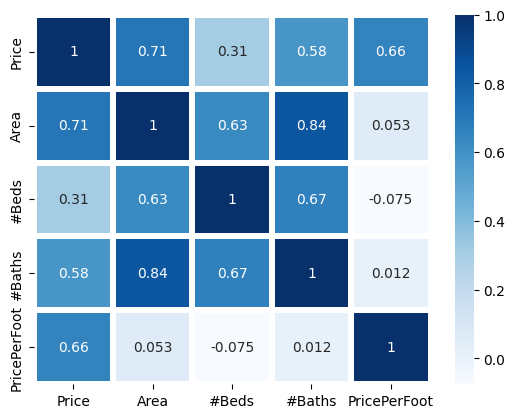

In [6]:
sns.heatmap(data[['Price', 'Area', '#Beds','#Baths','PricePerFoot']].corr(), cmap="Blues", linewidths=3, annot=True)
plt.show()

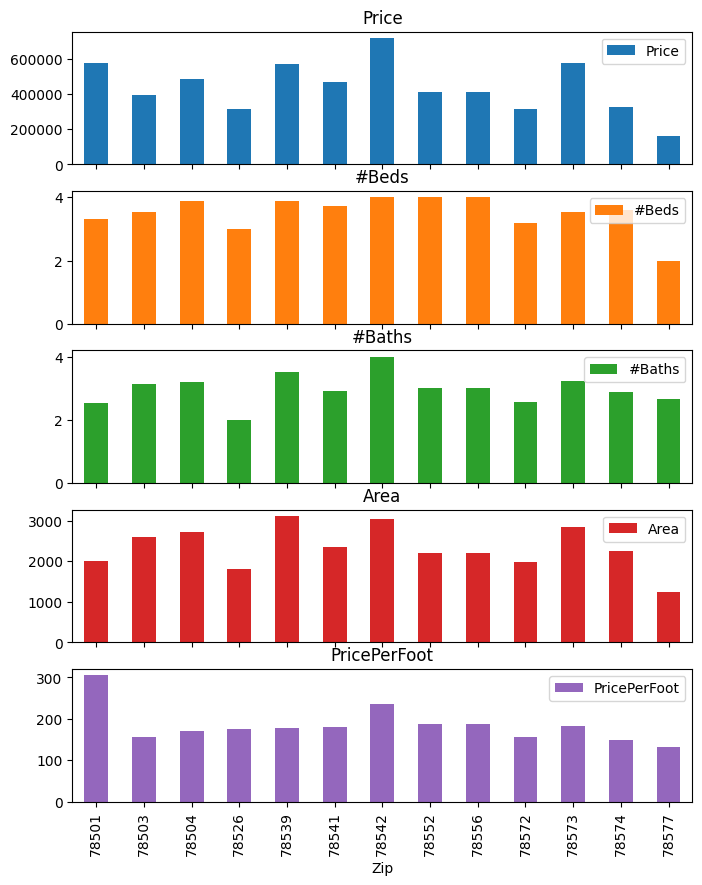

In [7]:
data.groupby("Zip").mean(numeric_only=True).plot.bar(subplots=True, sharey=False, figsize=(8,10))
plt.show()

In [8]:
pd.concat([data[['Area','#Beds']], pd.get_dummies(data["Zip"])], axis=1)

,Area,#Beds,78501,78503,78504,78526,78539,78541,78542,78552,78556,78572,78573,78574,78577
0,1802.0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1645.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1543.0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,2212.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,1464.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0
1171,7628.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0
1172,2142.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0
1174,1711.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
model = sm.OLS(
    endog=data['Price'],
    exog=sm.add_constant(
        pd.concat(
            [
                data[[
                    'Area',
                    '#Beds',
                    '#Baths',
                ]], 
                pd.get_dummies(data["Zip"])
            ], 
            axis=1
        )
    ),
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     65.78
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.30e-124
Time:                        17:50:30   Log-Likelihood:                -10459.
No. Observations:                 745   AIC:                         2.095e+04
Df Residuals:                     729   BIC:                         2.102e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.56e+05   6.14e+04      2.542      0.011    3.55e+04    2.76e+05
Area         265.5304     14.654     18.120      0.000     236.761     294.300
#Beds      -1.163e+05    1.6e+04     -7.248      0.000   -1.48e+05   -8.48e+04
#Baths      2.091e+04   1.68e+04      1.244      0.214   -1.21e+04    5.39e+04
78501       2.212e+05   5.58e+04      3.965      0.000    1.12e+05    3.31e+05
78503      -1.029e+05   8.29e+04     -1.240      0.215   -2.66e+05       6e+04
78504       -1.01e+04   5.15e+04     -0.196      0.845   -1.11e+05     9.1e+04
78526      -1.237e+04   2.87e+05     -0.043      0.966   -5.76e+05    5.51e+05
78539      -3.581e+04   5.58e+04     -0.642      0.521   -1.45e+05    7.36e+04
78541       5.893e+04   7.64e+04      0.772      0.441    -9.1e+04    2.09e+05
78542        1.35e+05   2.87e+05      0.470      0.638   -4.29e+05    6.99e+05
78552       7.528e+04   2.87e+05      0.262      0.793   -4.89e+05    6.39e+05
78556       7.528e+04   2.87e+05      0.262      0.793   -4.89e+05    6.39e+05
78572      -4.545e+04   5.24e+04     -0.867      0.386   -1.48e+05    5.75e+04
78573       1.003e+04   5.24e+04      0.191      0.848   -9.29e+04    1.13e+05
78574       -6.78e+04   5.74e+04     -1.181      0.238   -1.81e+05    4.49e+04
78577      -1.453e+05   1.71e+05     -0.848      0.397   -4.82e+05    1.91e+05
==============================================================================
Omnibus:                      707.151   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35049.271
Skew:                           4.183   Prob(JB):                         0.00
Kurtosis:                      35.544   Cond. No.                     2.05e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""